# 특성 공학과 규제

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/hg-mldl/blob/master/3-3.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

## 데이터 준비

In [4]:
import pandas as pd

In [11]:
# 웹에서 CSV 파일을 읽어와 DataFrame으로 로드합니다
df = pd.read_csv('https://bit.ly/perch_csv_data')

# DataFrame을 NumPy 배열로 변환합니다
perch_full = df.to_numpy()

# 변환된 NumPy 배열을 출력합니다
print(perch_full)


[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

In [12]:
import numpy as np

perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )

In [13]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state=42)

## 사이킷런의 변환기

In [14]:
from sklearn.preprocessing import PolynomialFeatures

In [20]:
# 기본적으로 2차 다항식 변환을 적용합니다  = degree = 2
poly = PolynomialFeatures()

# PolynomialFeatures 객체를 학습시키기 위해 예제 데이터를 사용합니다
# 여기서는 [2, 3]이라는 단일 샘플을 사용하여 다항식 변환의 기준을 설정합니다
poly.fit([[2, 3]])

# 변환할 데이터를 [2, 3]으로 설정하고, 해당 데이터에 대해 다항식 변환을 적용합니다
# 이 경우, 변환된 결과는 [1, 2, 3, 4, 6, 9]입니다. (제곱 및 상호작용 항 포함)
print(poly.transform([[2, 3]]))


[[1. 2. 3. 4. 6. 9.]]


In [21]:
# PolynomialFeatures 객체를 생성합니다
# include_bias=False로 설정하여 편향 항(bias term) (즉, 상수 1)을 포함하지 않습니다
poly = PolynomialFeatures(include_bias=False)

# PolynomialFeatures 객체를 학습시키기 위해 예제 데이터를 사용합니다
# 여기서는 [2, 3]이라는 단일 샘플을 사용하여 다항식 변환의 기준을 설정합니다
poly.fit([[2, 3]])

# 변환할 데이터를 [2, 3]으로 설정하고, 해당 데이터에 대해 다항식 변환을 적용합니다
# include_bias=False로 설정했기 때문에 상수 항이 제외된 변환 결과가 출력됩니다
print(poly.transform([[2, 3]]))


[[2. 3. 4. 6. 9.]]


In [22]:
# PolynomialFeatures 객체를 생성합니다
# include_bias=False로 설정하여 편향 항(bias term) (즉, 상수 1)을 포함하지 않습니다
poly = PolynomialFeatures(include_bias=False)

# 학습 데이터를 사용하여 PolynomialFeatures 객체를 학습시킵니다
# 이 과정에서 입력 데이터에 대한 다항식 변환 기준이 설정됩니다
poly.fit(train_input)

# 학습된 PolynomialFeatures 객체를 사용하여 훈련 데이터에 다항식 변환을 적용합니다
# 변환된 데이터는 원래의 입력 값에 대해 제곱 및 상호작용 항을 포함합니다
train_poly = poly.transform(train_input)


In [23]:
print(train_poly.shape)

(42, 9)


In [24]:
poly.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

In [27]:
test_poly = poly.transform(test_input)

## 다중 회귀 모델 훈련하기

In [28]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.9903183436982126


In [29]:
print(lr.score(test_poly, test_target))

0.9714559911594143


In [30]:
poly = PolynomialFeatures(degree=5, include_bias=False)

poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

In [31]:
print(train_poly.shape)

(42, 55)


In [32]:
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.999999999998714


In [33]:
print(lr.score(test_poly, test_target))

-144.4066764700865


## 규제

In [35]:
from sklearn.preprocessing import StandardScaler  # Scikit-learn에서 StandardScaler 클래스를 불러옵니다

# StandardScaler 객체를 생성합니다
# StandardScaler는 데이터의 평균을 0으로, 표준편차를 1로 변환하여 데이터의 스케일을 조정합니다
ss = StandardScaler()

# 훈련 데이터(train_poly)를 사용하여 StandardScaler 객체를 학습시킵니다
# 이 과정에서 훈련 데이터의 평균과 표준편차를 계산
ss.fit(train_poly)

# 훈련 데이터에 대해 변환을 적용하여 스케일 조정된 데이터를 생성합니다
# 각 특성이 평균 0, 표준편차 1로 변환됩니다
train_scaled = ss.transform(train_poly)

# 테스트 데이터(test_poly)에 대해서도 동일한 스케일 변환을 적용합니다
# 훈련 데이터에서 계산한 평균과 표준편차를 사용하여 테스트 데이터를 변환합니다
test_scaled = ss.transform(test_poly)


## 릿지

In [40]:
from sklearn.linear_model import Ridge  # Scikit-learn에서 Ridge 회귀 클래스를 불러옵니다

# Ridge 회귀 모델 객체를 생성합니다
# Ridge 회귀는 L2 정규화를 포함하여 과대적합을 방지합니다
ridge = Ridge()

# 표준화된 훈련 데이터(train_scaled)와 훈련 타겟 데이터(train_target)를 사용하여 모델을 학습합니다
# L2 정규화를 적용하여 과대적합을 줄이고 일반화 성능을 향상시킵니다
ridge.fit(train_scaled, train_target)

# 훈련 데이터에 대한 모델의 성능 점수를 출력합니다
# score() 메서드는 R^2 (결정 계수) 값을 반환합니다
# 값이 1에 가까울수록 모델이 훈련 데이터에 잘 맞는 것입니다
print(ridge.score(train_scaled, train_target))


0.9896101671037343


In [41]:
print(ridge.score(test_scaled, test_target))

0.9790693977615391


In [44]:
import matplotlib.pyplot as plt  # Matplotlib의 pyplot 모듈을 불러옵니다. 시각화를 위한 도구입니다.

# 훈련 데이터의 성능 점수를 저장할 빈 리스트를 생성합니다
# 모델의 성능을 반복적으로 평가하기 위해 사용됩니다
train_score = []

# 테스트 데이터의 성능 점수를 저장할 빈 리스트를 생성합니다
# 모델의 일반화 성능을 반복적으로 평가하기 위해 사용됩니다
test_score = []


In [45]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]  # Ridge 회귀 모델의 정규화 강도(alpha)를 설정할 값들을 리스트로 정의합니다

for alpha in alpha_list:  # 정의된 alpha 값들을 반복하며 모델을 학습합니다
    # 현재 alpha 값으로 Ridge 회귀 모델 객체를 생성합니다
    ridge = Ridge(alpha=alpha)
    
    # 표준화된 훈련 데이터(train_scaled)와 훈련 타겟 데이터(train_target)를 사용하여 모델을 학습합니다
    ridge.fit(train_scaled, train_target)
    
    # 학습된 모델의 훈련 데이터에 대한 성능 점수를 계산하여 train_score 리스트에 추가합니다
    train_score.append(ridge.score(train_scaled, train_target))
    
    # 학습된 모델의 테스트 데이터에 대한 성능 점수를 계산하여 test_score 리스트에 추가합니다
    test_score.append(ridge.score(test_scaled, test_target))


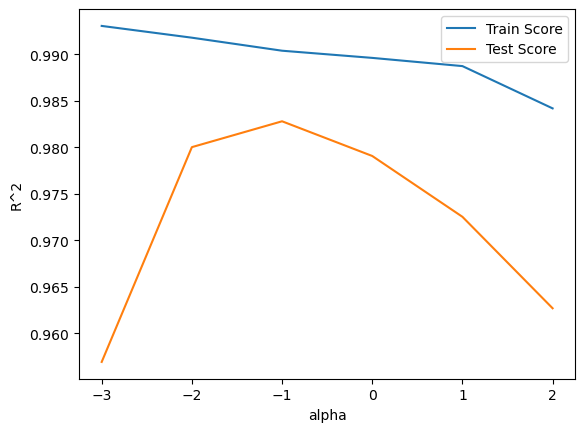

In [47]:
# alpha_list의 로그 스케일에 따른 훈련 데이터의 성능 점수를 그래프로 표시합니다
# np.log10(alpha_list)로 alpha 값을 로그 스케일로 변환하여 x축에 사용합니다
plt.plot(np.log10(alpha_list), train_score, label='Train Score')

# alpha_list의 로그 스케일에 따른 테스트 데이터의 성능 점수를 그래프로 표시합니다
# np.log10(alpha_list)로 alpha 값을 로그 스케일로 변환하여 x축에 사용합니다
plt.plot(np.log10(alpha_list), test_score, label='Test Score')

# x축 레이블을 'alpha'로 설정합니다
# 로그 스케일로 변환된 alpha 값을 나타냅니다
plt.xlabel('alpha')

# y축 레이블을 'R^2'로 설정합니다
# R^2 (결정 계수) 값으로 모델의 성능을 나타냅니다
plt.ylabel('R^2')

# 그래프에 레이블을 추가합니다
plt.legend()

# 그래프를 화면에 표시합니다
plt.show()


In [49]:
# 정규화 강도 alpha=0.1로 Ridge 회귀 모델 객체를 생성합니다
ridge = Ridge(alpha=0.1)

# 표준화된 훈련 데이터(train_scaled)와 훈련 타겟 데이터(train_target)를 사용하여 모델을 학습합니다
ridge.fit(train_scaled, train_target)

# 학습된 Ridge 회귀 모델의 훈련 데이터에 대한 R^2 점수를 출력합니다
# 이 값은 모델이 훈련 데이터에 얼마나 잘 적합되는지를 나타냅니다
print(ridge.score(train_scaled, train_target))

# 학습된 Ridge 회귀 모델의 테스트 데이터에 대한 R^2 점수를 출력합니다
# 이 값은 모델의 일반화 성능을 나타내며, 테스트 데이터에 대해 얼마나 잘 예측하는지를 나타냅니다
print(ridge.score(test_scaled, test_target))


0.9903815817570366
0.9827976465386989


## 라쏘

In [51]:
from sklearn.linear_model import Lasso  # Scikit-learn에서 Lasso 회귀 클래스를 불러옵니다

# Lasso 회귀 모델 객체를 생성합니다
# Lasso 회귀는 L1 정규화를 적용하여 과대적합을 방지하고, 일부 특성의 계수를 0으로 만들어 특성 선택을 수행합니다
lasso = Lasso()

# 표준화된 훈련 데이터(train_scaled)와 훈련 타겟 데이터(train_target)를 사용하여 모델을 학습합니다
lasso.fit(train_scaled, train_target)

# 학습된 Lasso 회귀 모델의 훈련 데이터에 대한 R^2 점수를 출력합니다
# 이 값은 모델이 훈련 데이터에 얼마나 잘 적합되는지를 나타냅니다
print(lasso.score(train_scaled, train_target))


0.989789897208096


In [53]:
print(lasso.score(test_scaled, test_target))

0.9800593698421886


In [55]:
from sklearn.linear_model import Lasso  # Scikit-learn에서 Lasso 회귀 클래스를 불러옵니다

# 훈련 데이터의 성능 점수를 저장할 빈 리스트를 생성합니다
train_score = []

# 테스트 데이터의 성능 점수를 저장할 빈 리스트를 생성합니다
test_score = []

# 다양한 alpha 값을 리스트로 정의합니다
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

# 각 alpha 값에 대해 반복하며 Lasso 회귀 모델을 학습합니다
for alpha in alpha_list:
    # 현재 alpha 값과 max_iter=10000을 설정하여 Lasso 회귀 모델 객체를 생성합니다
    # max_iter는 최적화 알고리즘의 최대 반복 횟수를 설정하여 수렴을 보장합니다
    lasso = Lasso(alpha=alpha, max_iter=10000)
    
    # 표준화된 훈련 데이터(train_scaled)와 훈련 타겟 데이터(train_target)를 사용하여 모델을 학습합니다
    lasso.fit(train_scaled, train_target)
    
    # 학습된 Lasso 모델의 훈련 데이터에 대한 R^2 점수를 계산하여 train_score 리스트에 추가합니다
    train_score.append(lasso.score(train_scaled, train_target))
    
    # 학습된 Lasso 모델의 테스트 데이터에 대한 R^2 점수를 계산하여 test_score 리스트에 추가합니다
    test_score.append(lasso.score(test_scaled, test_target))


c:\ProgramData\anaconda3\envs\practice_mldl\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.878e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
c:\ProgramData\anaconda3\envs\practice_mldl\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.297e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(


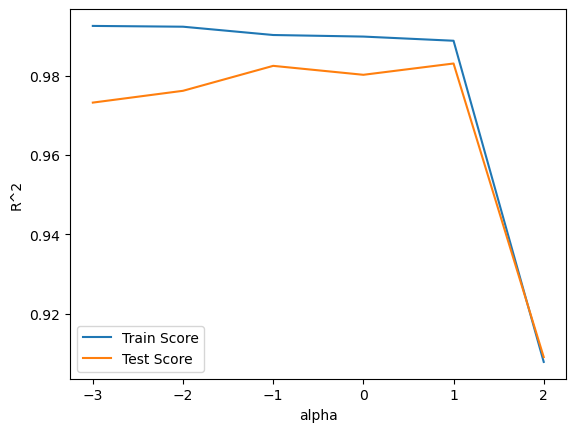

In [61]:
# alpha_list의 로그 스케일에 따른 훈련 데이터의 성능 점수를 그래프로 표시합니다
# np.log10(alpha_list)로 alpha 값을 로그 스케일로 변환하여 x축에 사용합니다
plt.plot(np.log10(alpha_list), train_score, label='Train Score')

# alpha_list의 로그 스케일에 따른 테스트 데이터의 성능 점수를 그래프로 표시합니다
# np.log10(alpha_list)로 alpha 값을 로그 스케일로 변환하여 x축에 사용합니다
plt.plot(np.log10(alpha_list), test_score, label='Test Score')

# x축 레이블을 'alpha'로 설정합니다
# 로그 스케일로 변환된 alpha 값을 나타냅니다
plt.xlabel('alpha')

# y축 레이블을 'R^2'로 설정합니다
# R^2 (결정 계수) 값으로 모델의 성능을 나타냅니다
plt.ylabel('R^2')

# 그래프에 레이블을 추가합니다
# 'Train Score'와 'Test Score'는 각 선을 설명하는 범례로 추가됩니다
plt.legend()

# 그래프를 화면에 표시합니다
plt.show()


In [62]:
lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_target)

print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9888067471131867
0.9824470598706695


In [64]:
# Lasso 회귀 모델의 계수 중 0인 값의 개수를 계산하여 출력합니다
# lasso.coef_는 Lasso 모델의 각 특성에 대한 계수를 나타냅니다
# np.sum(lasso.coef_ == 0) 은 계수 값이 0인 경우를 True로 간주하고 이를 합산하여 0인 계수의 개수를 계산
print(np.sum(lasso.coef_ == 0))


40
